In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, metrics,
                     model_selection as skms,
                     naive_bayes, neighbors)
test_data = pd.read_csv("test.csv")
test_data.head()

,x_value,y_value,eye_side,Intoxication
0,19.892277,12.871951,right,0
1,19.007092,12.002027,right,0
2,18.275082,11.736785,right,0
3,18.851215,11.417740,right,0
4,16.795181,12.278447,right,0


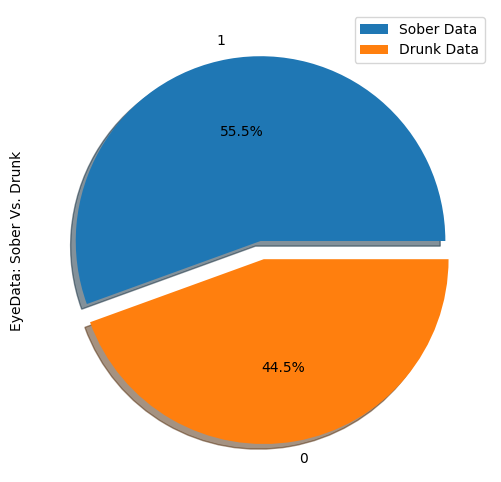

In [48]:
import matplotlib.pyplot as plt
# Helper function for data distribution
# Visualize the proportion of borrowers
def show_test_distrib(data):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data["Intoxication"].value_counts()
  else:
      count = data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.1], 

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("EyeData: Sober Vs. Drunk")
  plt.legend(["Sober Data", "Drunk Data"])
  plt.show()


# Visualize the proportion of borrowers
show_test_distrib(test_data)

In [49]:

features = test_data[['x_value', 'y_value', 'eye_side']]
target = test_data['Intoxication']

# Split the data into a training set and a test set
(train_ftrs, test_ftrs, train_tgt, test_tgt) = skms.train_test_split(features, target, test_size=.25)

# Display the first few rows of the test features and targets
test_data['eye_side'] = test_data['eye_side'].map({1: 'right', 0: 'left'})
test_data['Intoxication'] = test_data['Intoxication'].map({1: 'drunk', 0: 'sober'})
display(pd.concat([test_data.head(3),
                   test_data.tail(3)]))

,x_value,y_value,eye_side,Intoxication
0,19.892277,12.871951,right,sober
1,19.007092,12.002027,right,sober
2,18.275082,11.736785,right,sober
737,22.754580,11.397436,right,drunk
738,23.998028,11.648915,right,drunk
739,20.936417,11.720616,right,drunk


In [51]:
kNN_model = neighbors.KNeighborsClassifier(n_neighbors=3)
kNN_fit = kNN_model.fit(train_ftrs, train_tgt)
kNN_predictions = kNN_fit.predict(test_ftrs)
kNN_score = metrics.accuracy_score(test_tgt, kNN_predictions)
print(f'kNN model accuracy: {kNN_score:0.2f}')

ValueError: could not convert string to float: 'left'